# Node2Vec Graph Analysis

## 1. Creating the Graph and Computing Embeddings

First, we created a graph projection and computed node2vec embeddings using Neo4j:

```cypher
CALL gds.graph.project.cypher(
  'Node2VecGraph',
  'MATCH (n:Area_4) RETURN id(n) AS id',
  'MATCH (n)-[r:trip]->(m)
   WHERE r.NB IS NOT NULL
   RETURN id(n) AS source, id(m) AS target, r.NB AS weight'
);

```

## 2. Exporting the Embeddings

We exported the embeddings to a CSV file for further analysis:

```cypher
CALL apoc.export.csv.query(
  'CALL gds.node2vec.stream("Node2VecGraph", {
    embeddingDimension: 256,
    walkLength: 15,
    iterations: 15,
    inOutFactor: 2.0,
    returnFactor: 1.0,
    relationshipWeightProperty: "weight"
  })
  YIELD nodeId, embedding
  WITH gds.util.asNode(nodeId) AS node, embedding
  RETURN
    node.name_4 AS city,
    node.name_1 AS region,
    embedding',
   "node2vec_embeddings.csv",
  {}
);

```



In [20]:
import pandas as pd
import ast
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import top_k_accuracy_score

# Load the embeddings from the exported CSV
data = pd.read_csv("node2vec_embeddings.csv")

# Convert embeddings from string to numeric array
data['embedding'] = data['embedding'].apply(ast.literal_eval)

# Extract features (embeddings) and labels (regions)
X = np.array(data['embedding'].to_list())
y = data['region']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)



# Evaluate the model
y_pred = clf.predict(X_test)
top1 = clf.score(X_test, y_test)  # Top-1 accuracy
top3 = top_k_accuracy_score(y_test, clf.predict_proba(X_test), k=3)
top5 = top_k_accuracy_score(y_test, clf.predict_proba(X_test), k=5)

print(f"Top-1 Accuracy: {top1:.4f}")
print(f"Top-3 Accuracy: {top3:.4f}")
print(f"Top-5 Accuracy: {top5:.4f}")


Top-1 Accuracy: 0.1371
Top-3 Accuracy: 0.3510
Top-5 Accuracy: 0.5192


[0]	validation_0-mlogloss:2.56385
[1]	validation_0-mlogloss:2.56304
[2]	validation_0-mlogloss:2.56189
[3]	validation_0-mlogloss:2.56098
[4]	validation_0-mlogloss:2.56025
[5]	validation_0-mlogloss:2.55927
[6]	validation_0-mlogloss:2.55863
[7]	validation_0-mlogloss:2.55770
[8]	validation_0-mlogloss:2.55669
[9]	validation_0-mlogloss:2.55646
[10]	validation_0-mlogloss:2.55505
[11]	validation_0-mlogloss:2.55456
[12]	validation_0-mlogloss:2.55333
[13]	validation_0-mlogloss:2.55247
[14]	validation_0-mlogloss:2.55160
[15]	validation_0-mlogloss:2.55082
[16]	validation_0-mlogloss:2.55034
[17]	validation_0-mlogloss:2.55007
[18]	validation_0-mlogloss:2.54952
[19]	validation_0-mlogloss:2.54860
[20]	validation_0-mlogloss:2.54794
[21]	validation_0-mlogloss:2.54669
[22]	validation_0-mlogloss:2.54623
[23]	validation_0-mlogloss:2.54549
[24]	validation_0-mlogloss:2.54456
[25]	validation_0-mlogloss:2.54370
[26]	validation_0-mlogloss:2.54259
[27]	validation_0-mlogloss:2.54188
[28]	validation_0-mlogloss:2.5

<Figure size 1200x600 with 0 Axes>

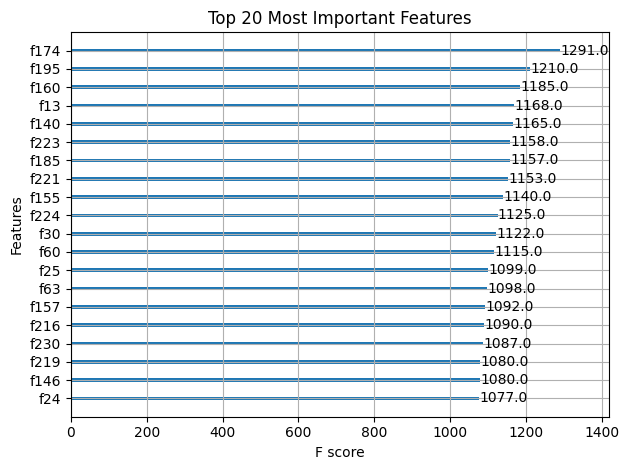


Detailed Classification Report:
                            precision    recall  f1-score   support

      Auvergne-Rhône-Alpes       0.11      0.26      0.15        95
   Bourgogne-Franche-Comté       0.00      0.00      0.00        56
                  Bretagne       0.00      0.00      0.00        37
       Centre-Val de Loire       1.00      0.03      0.05        36
                     Corse       0.00      0.00      0.00         9
                 Grand Est       0.06      0.03      0.04        69
           Hauts-de-France       0.09      0.04      0.05        57
                 Normandie       0.00      0.00      0.00        48
        Nouvelle-Aquitaine       0.10      0.25      0.15        96
                 Occitanie       0.15      0.29      0.19        90
          Pays de la Loire       0.00      0.00      0.00        38
Provence-Alpes-Côte d'Azur       0.00      0.00      0.00        42
             Île-de-France       0.11      0.02      0.03        57

             

/Users/alexs/PycharmProjects/MachineLearningForNLP/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alexs/PycharmProjects/MachineLearningForNLP/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alexs/PycharmProjects/MachineLearningForNLP/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control